# Clustering ML & Art

Clustering is a type of unsupervised learning technique used to group similar data points together. 

# Clustering: Machine Learning & Art

Clustering is an unsupervised learning technique used to group similar data points based on their features. By identifying inherent structures within the data, clustering allows us to uncover patterns and relationships that may not be immediately apparent.

In the realm of Machine Learning, clustering plays a crucial role in various applications, such as customer segmentation, image analysis, and anomaly detection. It enables us to categorize data into meaningful clusters without the need for labeled training data.

In the context of Art, clustering techniques can be particularly intriguing. They demonstrate how machines can identify patterns and relationships within artistic data, allowing us to explore connections between different pieces of a scene and enhancing artistic expression. By leveraging clustering, artists and researchers can gain deeper insights into the relationships that shape creative works.


Below is a compilation of various clustering techniques commonly used in Machine Learning. Each technique is presented with accompanying Python code and visualizations of the results, providing insights into the strengths and characteristics of each clustering approach.



In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


### K-Means Clustering

a popular clustering algorithm. It partitions the data into K clusters, where each data point belongs to the cluster with the nearest mean.

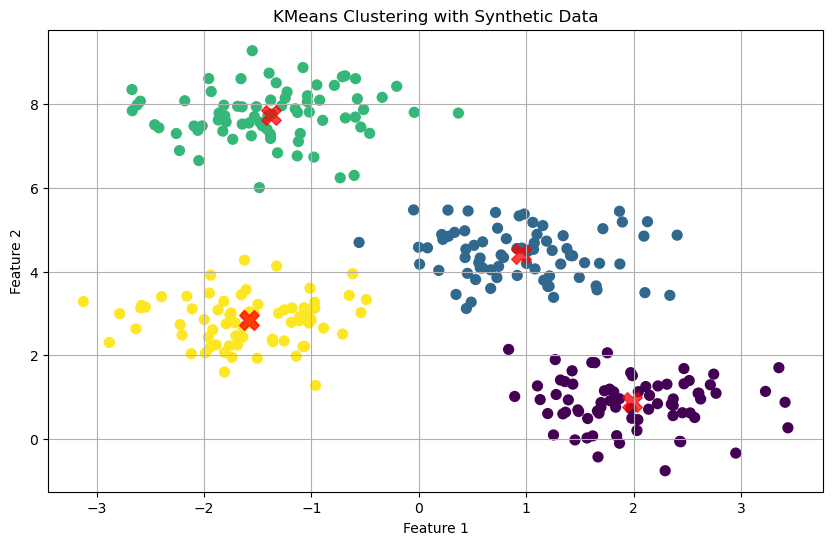

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # For reproducibility

# Generate synthetic data
n_samples = 300
n_clusters = 4
X, _ = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=0.60, random_state=0)

# KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('KMeans Clustering with Synthetic Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()



###  Hierarchical Clustering

builds a tree of clusters; it can be agglomerative (bottom-up) or divisive (top-down).

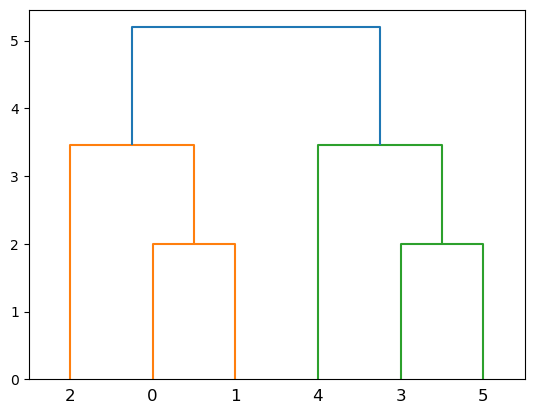

In [4]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Sample data
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

# Hierarchical Clustering
Z = linkage(X, 'ward')
dendrogram(Z)
plt.show()



### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

groups together points that are packed closely together, marking as outliers points that lie alone in low-density regions.


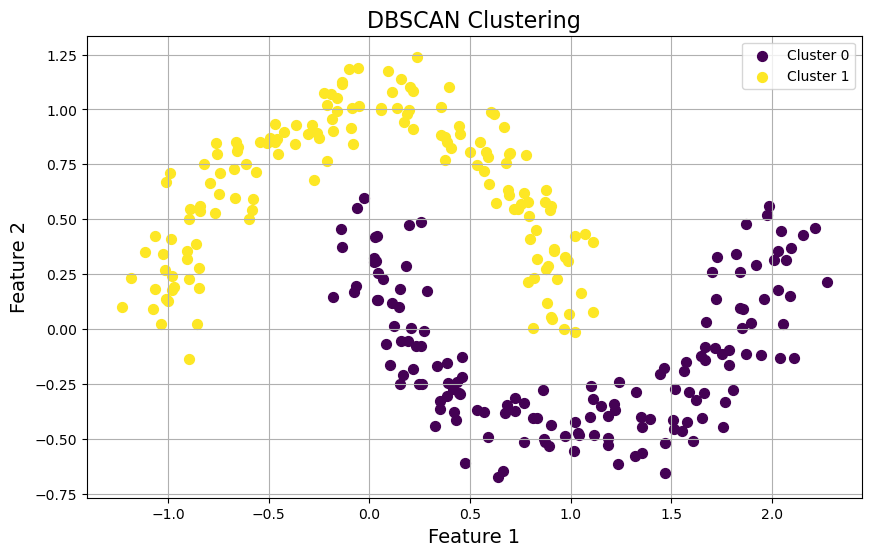

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = dbscan.labels_

# Create a color map
unique_labels = set(labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot
plt.figure(figsize=(10, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise points
        col = 'k'  # Black for noise
    class_member_mask = (labels == k)
    plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1], 
                s=50, color=col, label=f'Cluster {k}' if k != -1 else 'Noise')

# Add titles and labels
plt.title('DBSCAN Clustering', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig('dbscan_clustering.png', dpi=300)
plt.show()



### Gaussian Mixture Models (GMM)

GMM assumes that the data is generated from a mixture of several Gaussian distributions with unknown parameters.


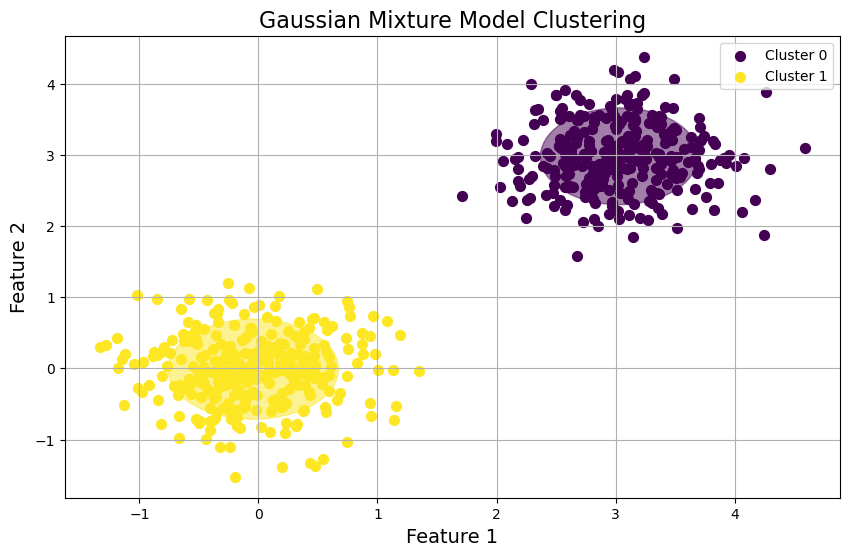

In [11]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
n_samples = 300
X1 = np.random.normal(loc=[0, 0], scale=0.5, size=(n_samples, 2))
X2 = np.random.normal(loc=[3, 3], scale=0.5, size=(n_samples, 2))
X = np.vstack((X1, X2))

# GMM
gmm = GaussianMixture(n_components=2, random_state=0).fit(X)
labels = gmm.predict(X)

# Create a color map
unique_labels = set(labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot
plt.figure(figsize=(10, 6))
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1], 
                s=50, color=col, label=f'Cluster {k}')

# Plot Gaussian ellipses
def plot_ellipse(ax, gmm, pos, color):
    v, w = np.linalg.eigh(gmm.covariances_[pos])
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)  # Scale by 2 standard deviations
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = np.degrees(angle)
    ell = plt.matplotlib.patches.Ellipse(gmm.means_[pos], 
                                          width=v[0], height=v[1], 
                                          angle=180 + angle, 
                                          color=color, alpha=0.5)
    ax.add_patch(ell)

# Add ellipses for each Gaussian component
for i in range(gmm.n_components):
    plot_ellipse(plt.gca(), gmm, i, colors[i])

# Add titles and labels
plt.title('Gaussian Mixture Model Clustering', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig('gmm_clustering.png', dpi=300)
plt.show()


### Mean-Shift Clustering

Mean-Shift is a centroid-based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region.


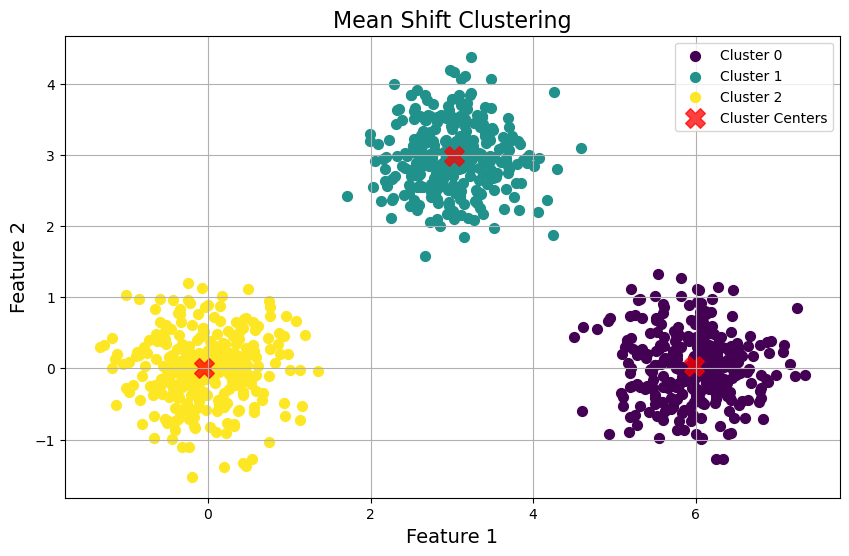

In [13]:
from sklearn.cluster import MeanShift
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
n_samples = 300
X1 = np.random.normal(loc=[0, 0], scale=0.5, size=(n_samples, 2))
X2 = np.random.normal(loc=[3, 3], scale=0.5, size=(n_samples, 2))
X3 = np.random.normal(loc=[6, 0], scale=0.5, size=(n_samples, 2))
X = np.vstack((X1, X2, X3))

# Mean-Shift
meanshift = MeanShift().fit(X)
labels = meanshift.labels_
centers = meanshift.cluster_centers_

# Create a color map
unique_labels = set(labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot
plt.figure(figsize=(10, 6))
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1], 
                s=50, color=col, label=f'Cluster {k}')

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Cluster Centers')

# Add titles and labels
plt.title('Mean Shift Clustering', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig('meanshift_clustering.png', dpi=300)
plt.show()


### Affinity Propagation

creates clusters by sending messages between pairs of samples until convergence. It does not require the number of clusters to be specified in advance.


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


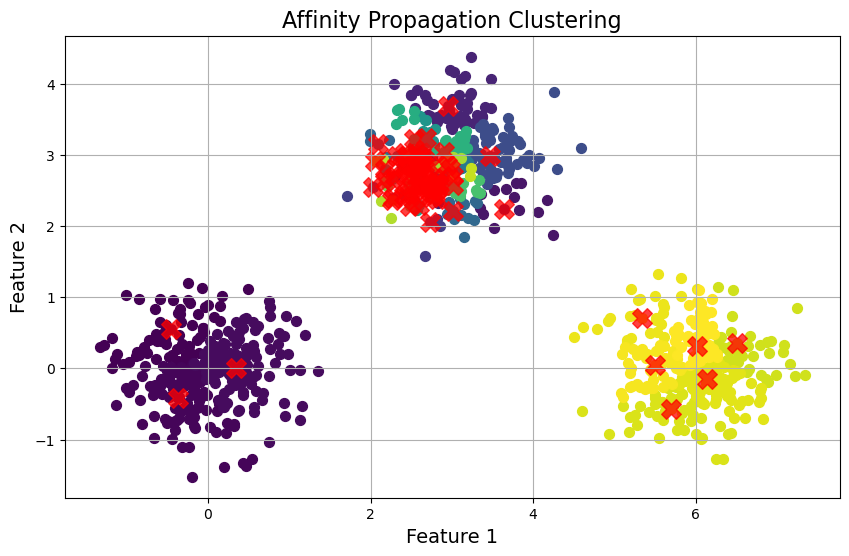

In [16]:
from sklearn.cluster import AffinityPropagation
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
n_samples = 300
X1 = np.random.normal(loc=[0, 0], scale=0.5, size=(n_samples, 2))
X2 = np.random.normal(loc=[3, 3], scale=0.5, size=(n_samples, 2))
X3 = np.random.normal(loc=[6, 0], scale=0.5, size=(n_samples, 2))
X = np.vstack((X1, X2, X3))

# Affinity Propagation
affinity_propagation = AffinityPropagation(random_state=0).fit(X)
labels = affinity_propagation.labels_
centers_indices = affinity_propagation.cluster_centers_indices_

# Create a color map
unique_labels = set(labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot
plt.figure(figsize=(10, 6))
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1], 
                s=50, color=col, label=f'Cluster {k}')

# Plot cluster centers
plt.scatter(X[centers_indices, 0], X[centers_indices, 1], c='red', s=200, alpha=0.75, marker='X', label='Cluster Centers')

# Add titles and labels
plt.title('Affinity Propagation Clustering', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
#plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig('affinity_propagation_clustering.png', dpi=300)
plt.show()


### Spectral Clustering

uses the eigenvalues of similarity matrices to perform dimensionality reduction before clustering in fewer dimensions.


/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


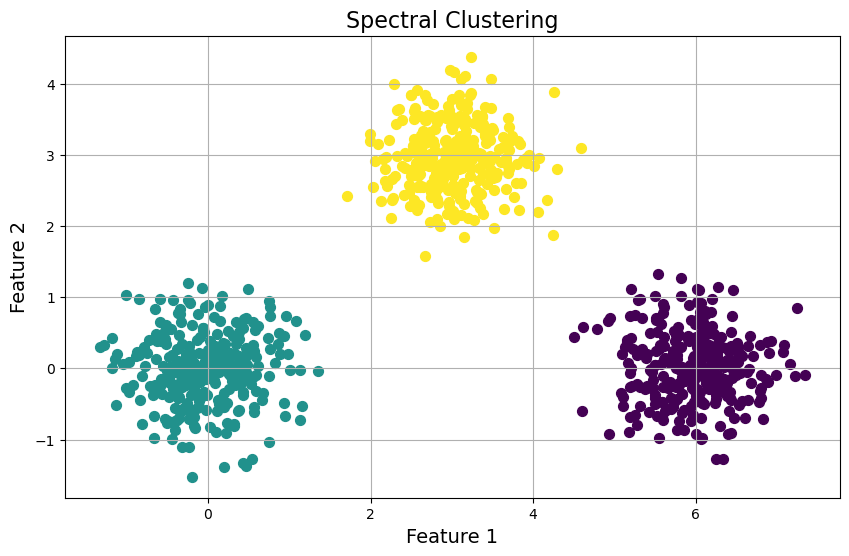

In [18]:
from sklearn.cluster import SpectralClustering
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
n_samples = 300
X1 = np.random.normal(loc=[0, 0], scale=0.5, size=(n_samples, 2))
X2 = np.random.normal(loc=[3, 3], scale=0.5, size=(n_samples, 2))
X3 = np.random.normal(loc=[6, 0], scale=0.5, size=(n_samples, 2))
X = np.vstack((X1, X2, X3))

# Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans', random_state=0).fit(X)
labels = spectral.labels_

# Create a color map
unique_labels = set(labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot
plt.figure(figsize=(10, 6))
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1], 
                s=50, color=col, label=f'Cluster {k}')

# Add titles and labels
plt.title('Spectral Clustering', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
#plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig('spectral_clustering.png', dpi=300)
plt.show()


### Birch (Balanced Iterative Reducing and Clustering using Hierarchies)

an unsupervised algorithm used for large datasets. It reduces the dimensionality of the data and then applies a hierarchical clustering method.


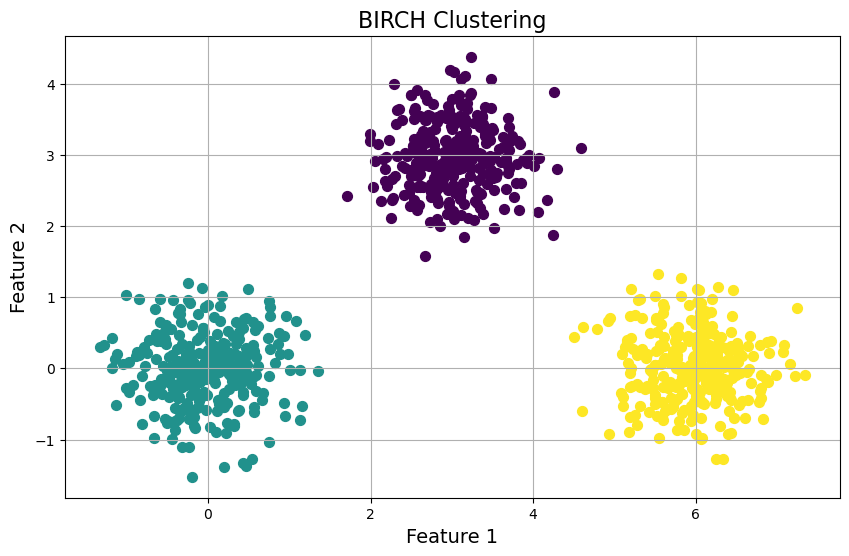

In [21]:
from sklearn.cluster import Birch
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
n_samples = 300
X1 = np.random.normal(loc=[0, 0], scale=0.5, size=(n_samples, 2))
X2 = np.random.normal(loc=[3, 3], scale=0.5, size=(n_samples, 2))
X3 = np.random.normal(loc=[6, 0], scale=0.5, size=(n_samples, 2))
X = np.vstack((X1, X2, X3))

# BIRCH
birch = Birch(n_clusters=3).fit(X)
labels = birch.labels_

# Create a color map
unique_labels = set(labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot
plt.figure(figsize=(10, 6))
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1], 
                s=50, color=col, label=f'Cluster {k}')

# Add titles and labels
plt.title('BIRCH Clustering', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
#plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig('birch_clustering.png', dpi=300)
plt.show()



### Optics (Ordering Points To Identify the Clustering Structure)

OPTICS is an extension of DBSCAN that produces a more nuanced clustering structure by creating an ordering of the data points.


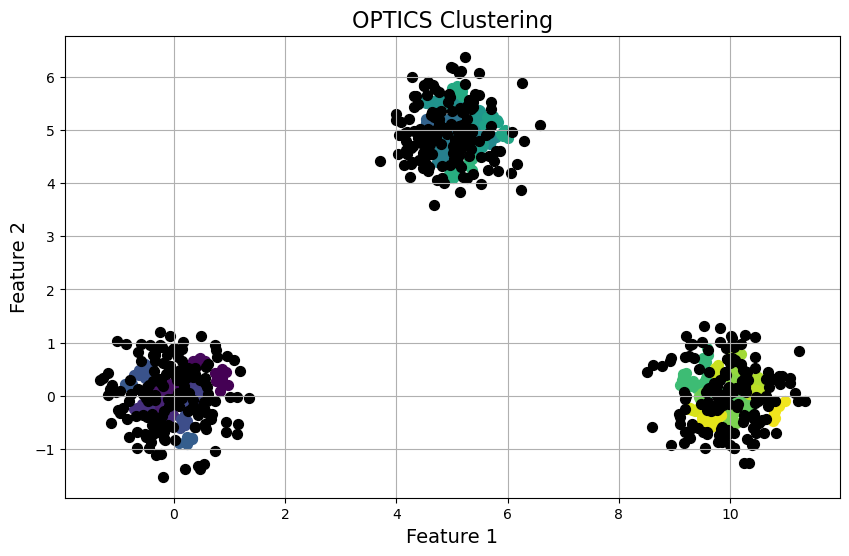

In [23]:
from sklearn.cluster import OPTICS
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
n_samples = 300
X1 = np.random.normal(loc=[0, 0], scale=0.5, size=(n_samples, 2))
X2 = np.random.normal(loc=[5, 5], scale=0.5, size=(n_samples, 2))
X3 = np.random.normal(loc=[10, 0], scale=0.5, size=(n_samples, 2))
X = np.vstack((X1, X2, X3))

# OPTICS
optics = OPTICS(min_samples=5).fit(X)
labels = optics.labels_

# Create a color map
unique_labels = set(labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot
plt.figure(figsize=(10, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'  # Black for noise
    class_member_mask = (labels == k)
    plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1], 
                s=50, color=col, label=f'Cluster {k}' if k != -1 else 'Noise')

# Add titles and labels
plt.title('OPTICS Clustering', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
#plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig('optics_clustering.png', dpi=300)
plt.show()


### Agglomerative Clustering with Different Linkage Criteria

Agglomerative Clustering can use different linkage criteria such as 'ward', 'complete', 'average', and 'single'.

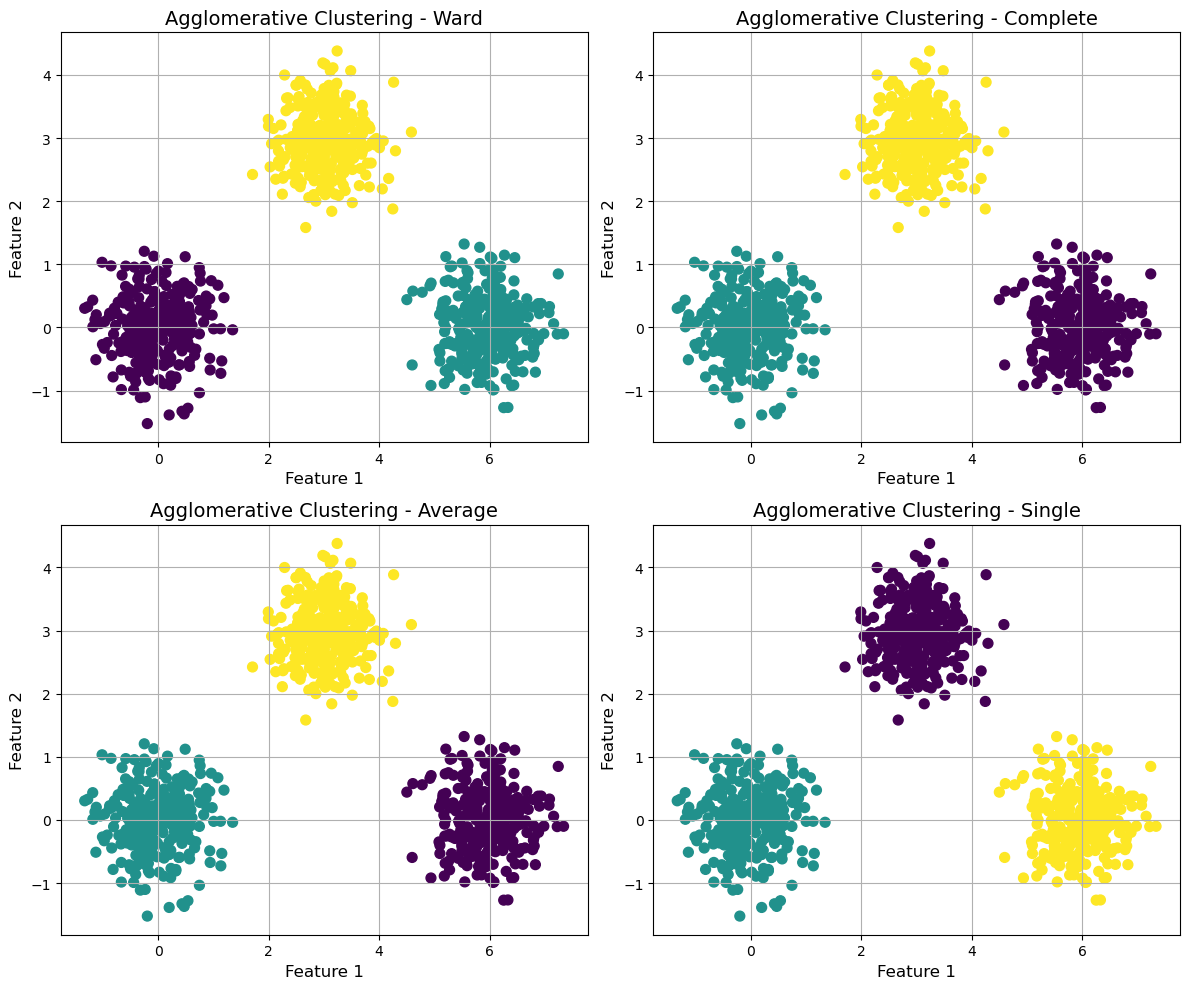

In [24]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
n_samples = 300
X1 = np.random.normal(loc=[0, 0], scale=0.5, size=(n_samples, 2))
X2 = np.random.normal(loc=[3, 3], scale=0.5, size=(n_samples, 2))
X3 = np.random.normal(loc=[6, 0], scale=0.5, size=(n_samples, 2))
X = np.vstack((X1, X2, X3))

# Agglomerative Clustering with different linkage criteria
linkage_methods = ['ward', 'complete', 'average', 'single']
labels = {}
for method in linkage_methods:
    agglo = AgglomerativeClustering(n_clusters=3, linkage=method).fit(X)
    labels[method] = agglo.labels_

# Plot
plt.figure(figsize=(12, 10))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=labels[method], s=50, cmap='viridis')
    plt.title(f'Agglomerative Clustering - {method.capitalize()}', fontsize=14)
    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.grid(True)

# Adjust layout
plt.tight_layout()

# Save the plot to a file
plt.savefig('agglomerative_clustering.png', dpi=300)
plt.show()



Each clustering technique has its own strengths and weaknesses, so the choice of method should depend on the dataset's characteristics and the analysis goals.

While neural networks have greatly enhanced machine learning, traditional clustering techniques are still important. They are simple, interpretable, and efficient, making them suitable for many applications.

Additionally, advancements in deep learning have led to hybrid models that combine traditional clustering with neural networks, enabling more complex analyses and insights, especially in intricate datasets.

As a result, clustering techniques remain relevant and widely used in modern machine learning, serving as essential methods for data exploration and pattern recognition in various fields, including art and AI.
